In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
from matplotlib import pyplot as plt
from keras.callbacks import TensorBoard

In [2]:
# this is our input placeholder
encoding_dim = 32 
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

hidden_1 = Dense(32, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden_1)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
tensorboard = TensorBoard(log_dir="logs/final", histogram_freq=1, write_graph=True, write_images=False)
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test), callbacks=[tensorboard])

Epoch 1/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 8.6667e-04 - val_loss: 0.6950 - val_accuracy: 6.0000e-04
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6950 - accuracy: 8.8333e-04 - val_loss: 0.6949 - val_accuracy: 7.0000e-04
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6948 - accuracy: 9.0000e-04 - val_loss: 0.6947 - val_accuracy: 7.0000e-04
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.6946 - accuracy: 9.6667e-04 - val_loss: 0.6946 - val_accuracy: 8.0000e-04
Epoch 5/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6945 - accuracy: 9.1667e-04 - val_loss: 0.6944 - val_accuracy: 0.0010


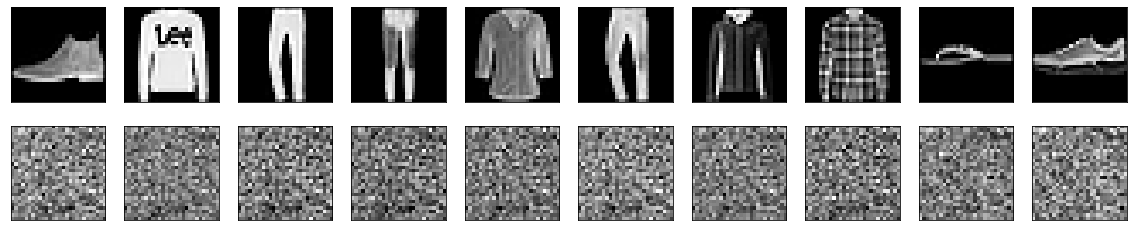

In [11]:
decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

prediction = autoencoder.predict(x_test[1].reshape(1,784))
# history = autoencoder.fit(x_train, x_train, batch_size=256, epochs=25, verbose=1,
#                    validation_data=(x_test, x_test))

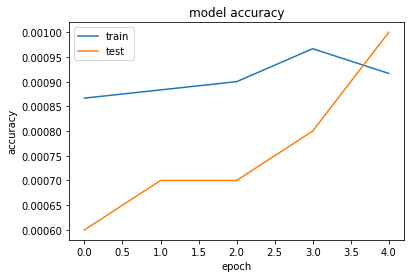

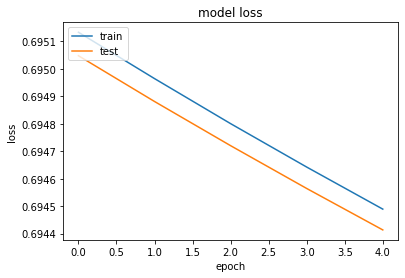

In [7]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

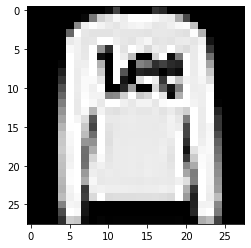

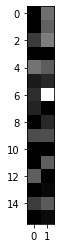

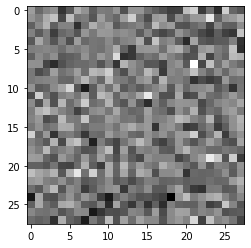

In [8]:
#bonus
plt.imshow(x_test[1].reshape(28,28))
plt.show()
plt.imshow(encoded_imgs[1].reshape(16,2))
plt.show()

plt.imshow(prediction.reshape(28,28))
plt.show()